`-` 데이터 source: http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020203

참고 https://velog.io/@isitcake_yes/mlarimastockprediction

# 

In [173]:
kakao <- read.csv("kakaodata_1206.csv", fileEncoding = "ISO-8859-1")

In [174]:
head(kakao)

,ÀÏÀÚ,Á...,X.ëºñ,µî.ô.ü,X.Ã..,X.í..,Àú..,X.Å....,X.Å...ë.Ý,X.Ã..ÃÑ..,X.óÀåÁÖ.Ä.ö
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,2023/12/06,50900,100,0.20,50700,51100,50200,735503,37302792200,2.262484e+13,444495970
2,2023/12/05,50800,0,0.00,50700,51200,50200,1142447,57992282100,2.258040e+13,444495970
3,2023/12/04,50800,1100,2.21,49800,51300,49750,1785113,90624610300,2.258040e+13,444495970
4,2023/12/01,49700,-800,-1.58,50400,50400,49650,1105367,55174771850,2.209145e+13,444495970
5,2023/11/30,50500,0,0.00,50200,50900,50000,1613598,81271347200,2.244705e+13,444495970
6,2023/11/29,50500,-600,-1.17,50800,51300,50100,1284120,65153113600,2.244705e+13,444495970


In [175]:
colnames(kakao) <- c("일자","종가","대비","등락률","시가","고가","저가","거래량","거래대금","시가총액","상장주식수")

In [176]:
kakao <- kakao[order(kakao$일자),]
rownames(kakao) <- NULL
head(kakao)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,2023/01/02,52700,-400,-0.75,53600,53800,52400,887667,46979376500,2.347313e+13,445410387
2,2023/01/03,53300,600,1.14,52400,53500,51400,1420569,74588286800,2.374037e+13,445410387
3,2023/01/04,55700,2400,4.50,53200,56000,53100,2241411,123346180300,2.480936e+13,445410387
4,2023/01/05,57700,2000,3.59,55800,58200,55700,3046064,175103778900,2.570018e+13,445410387
5,2023/01/06,57200,-500,-0.87,57200,58000,56500,1420345,81326211100,2.547747e+13,445410387
6,2023/01/09,61100,3900,6.82,58700,61200,58300,3482961,208443993900,2.721457e+13,445410387


- 시계열 데이터 분석을 하기 위해, 일단.. 일자와 종가만 선택하자.

In [177]:
data <- kakao$종가

In [178]:
data <- ts(data)
head(data)

A Time Series:
[1] 52700 53300 55700 57700 57200 61100

- 해당 데이터는 주식 데이터이기 때문에 중간에 공휴일로 인해 일자가 NA값이 있으므로 ts객체를 통해 그냥 해부림..

- 데이터가.. 아주 그냥 별로다

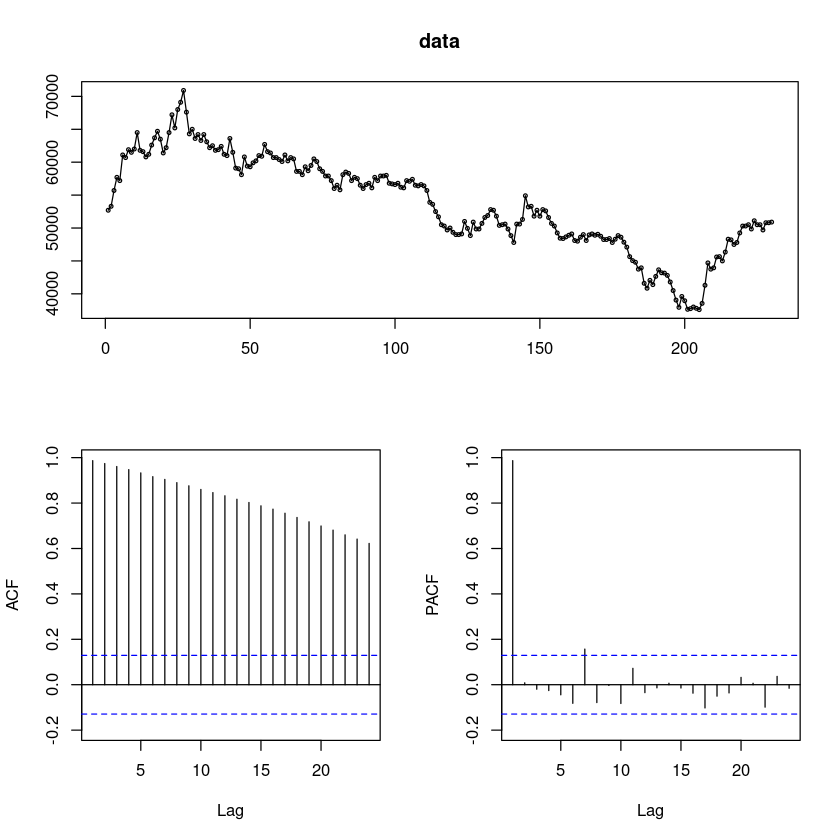

In [179]:
forecast::tsdisplay(data)


- 주식데이터가 평균이 일정하지 않은 비정상성의 특징을 보인다. 

- ARIMA의 d차수가 1이상일 것이다.

- 계절성분이나 다른 특징은 보이지 않는다. 

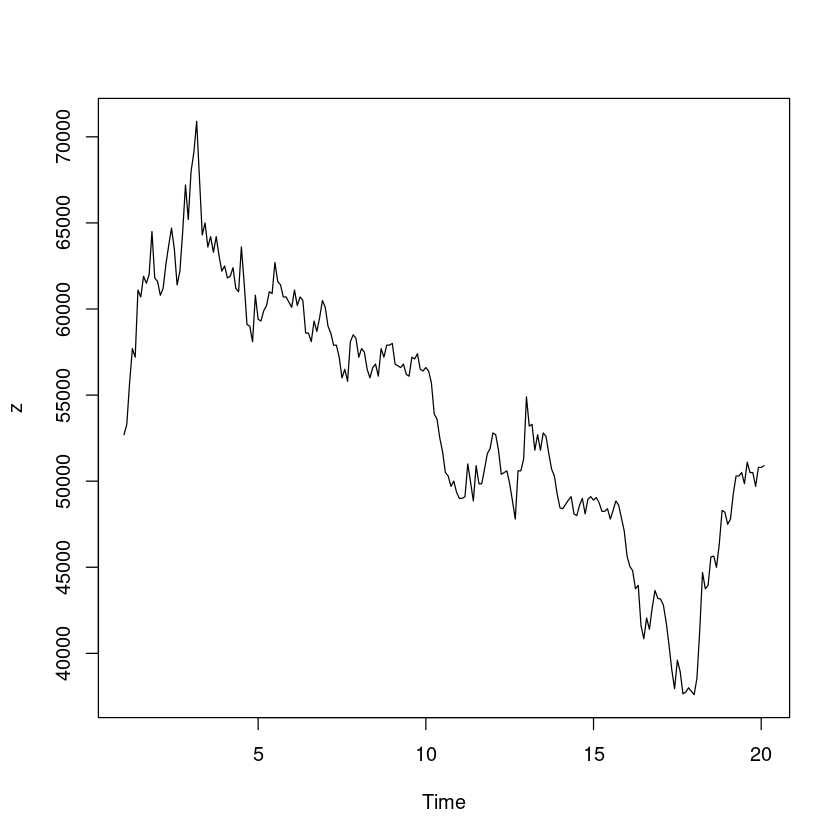

In [180]:
plot.ts(z)

In [181]:
mean(z)

[1] 53663.04

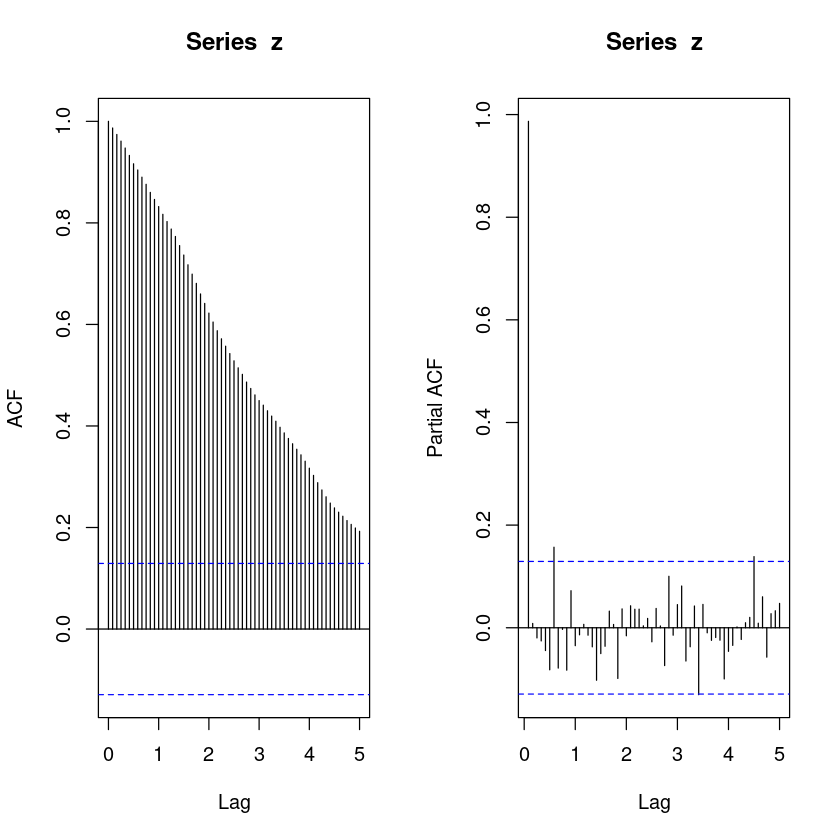

In [182]:
par(mfrow=c(1,2))
acf(z, lag.max=60)
pacf(z, lag.max=60)

- ACF가 천천히 줄어들고.. pacr가 첫번째 시차만 살아있고 나머지는 0이다.

- 시도표를 확인했을 때 계절성분은 없어보이고.. 추세는 조금 있어 보인다.

- AR(1)모형..?

`geom_smooth()` using formula = 'y ~ x'


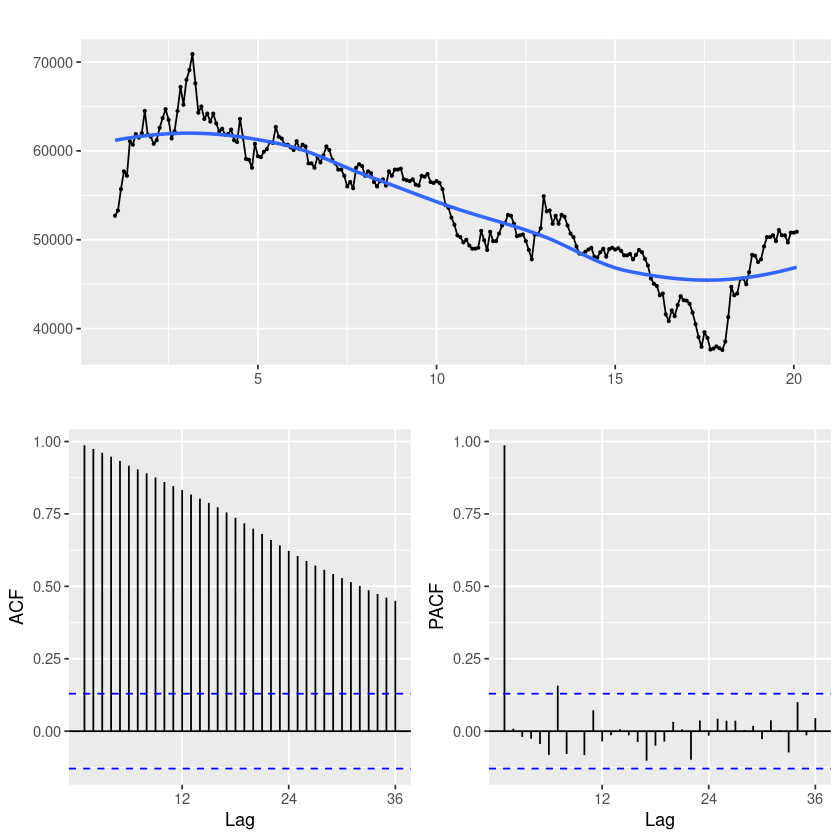

In [183]:
forecast::ggtsdisplay(z,
        smooth=T)

- ACF가 천천히 감소한다. 확률적 추세가 있어보인다.

In [184]:
fUnitRoots::adfTest(z, lags = 1, type = "c")
fUnitRoots::adfTest(z, lags = 30, type = "c")
fUnitRoots::adfTest(z, lags = 60, type = "c")


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -1.1594
  P VALUE:
    0.6251 

Description:
 Wed Dec  6 16:27:38 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 30
  STATISTIC:
    Dickey-Fuller: -1.2253
  P VALUE:
    0.6005 

Description:
 Wed Dec  6 16:27:38 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 60
  STATISTIC:
    Dickey-Fuller: -0.2159
  P VALUE:
    0.9282 

Description:
 Wed Dec  6 16:27:38 2023 by user: 

- 유의확률이 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 차분이 필요하다.

`geom_smooth()` using formula = 'y ~ x'


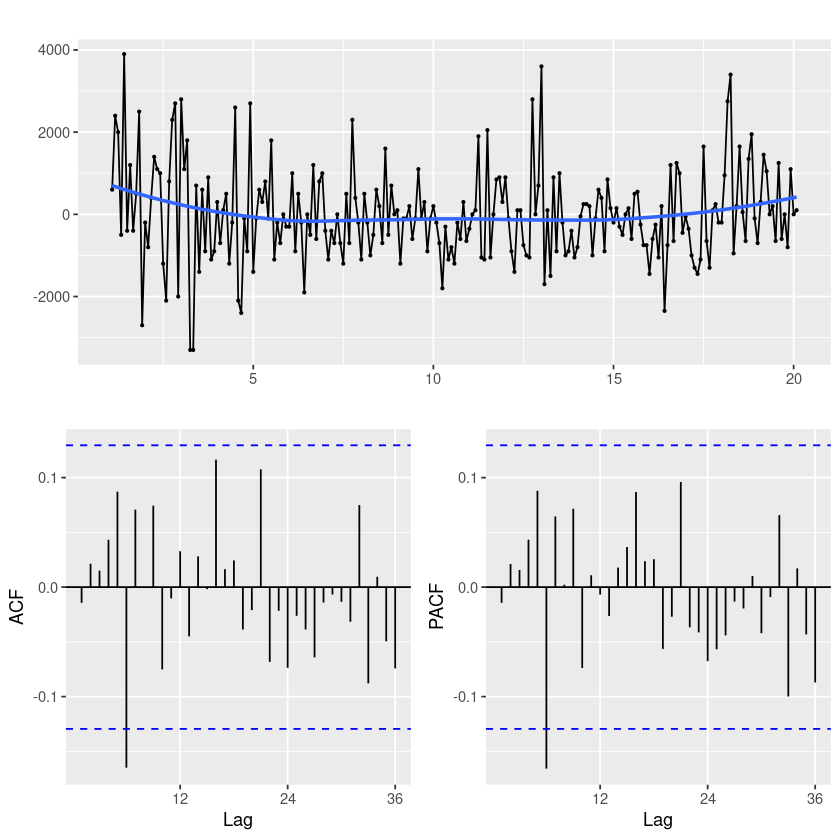

In [185]:
forecast::ggtsdisplay(diff(z),
        smooth=T)

- 0을 중심으로 움직인다.

- pacf가...감소하는 거 같은데...........................

- acf가..그림이 잇앙해.ㅐ.

In [186]:
## mean : H0 : mu = 0
t.test(lag_z)


	One Sample t-test

data:  lag_z
t = -0.10283, df = 228, p-value = 0.9182
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -158.4750  142.7545
sample estimates:
mean of x 
-7.860262 


- p-value = 0.9182로 평균이 0이다.

`-` 차분한 모형(평균f취함)

In [187]:
fit1 <- arima(lag_z, order=c(0,0,1), include.mean = F)
fit1


Call:
arima(x = lag_z, order = c(0, 0, 1), include.mean = F)

Coefficients:
          ma1
      -0.0137
s.e.   0.0646

sigma^2 estimated as 1331943:  log likelihood = -1939.63,  aic = 3883.27

`-` 원 모형

In [188]:
fit <- arima(z, order=c(0,1,1))
fit


Call:
arima(x = z, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.0137
s.e.   0.0646

sigma^2 estimated as 1331943:  log likelihood = -1939.63,  aic = 3883.27

$Z_t = ε_t -0.0137ε_t, \hat θ = 0.0137$

## 예측

In [195]:
fore_fit <- forecast::forecast(fit)
fore_fit

       Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 20       50898.63 49419.59 52377.66 48636.64 53160.62
Apr 20       50898.63 48821.22 52976.03 47721.51 54075.75
May 20       50898.63 48360.19 53437.07 47016.42 54780.84
Jun 20       50898.63 47970.87 53826.38 46421.01 55376.24
Jul 20       50898.63 47627.57 54169.68 45895.98 55901.28
Aug 20       50898.63 47317.03 54480.23 45421.04 56376.22
Sep 20       50898.63 47031.34 54765.92 44984.12 56813.14
Oct 20       50898.63 46765.35 55031.91 44577.32 57219.94
Nov 20       50898.63 46515.47 55281.79 44195.17 57602.09
Dec 20       50898.63 46279.09 55518.17 43833.65 57963.60
Jan 21       50898.63 46054.23 55743.03 43489.76 58307.50
Feb 21       50898.63 45839.35 55957.90 43161.13 58636.12
Mar 21       50898.63 45633.24 56164.02 42845.91 58951.35
Apr 21       50898.63 45434.89 56362.36 42542.57 59254.69
May 21       50898.63 45243.50 56553.76 42249.86 59547.40
Jun 21       50898.63 45058.38 56738.88 41966.73 59830.52
Jul 21       5

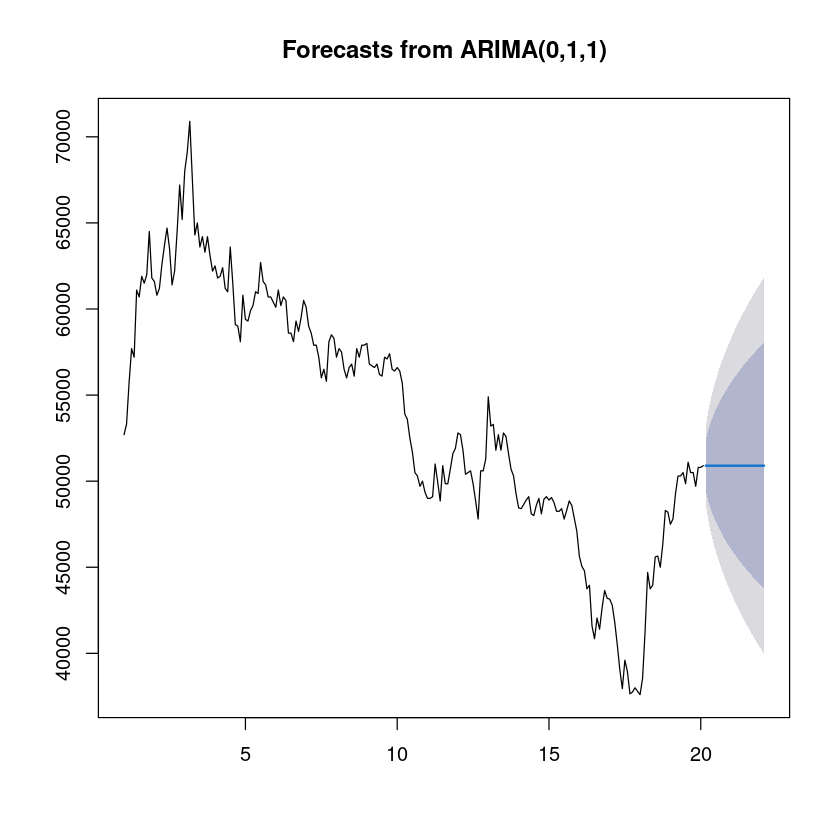

In [196]:
plot(fore_fit)


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 23.178, df = 23, p-value = 0.4504

Model df: 1.   Total lags used: 24



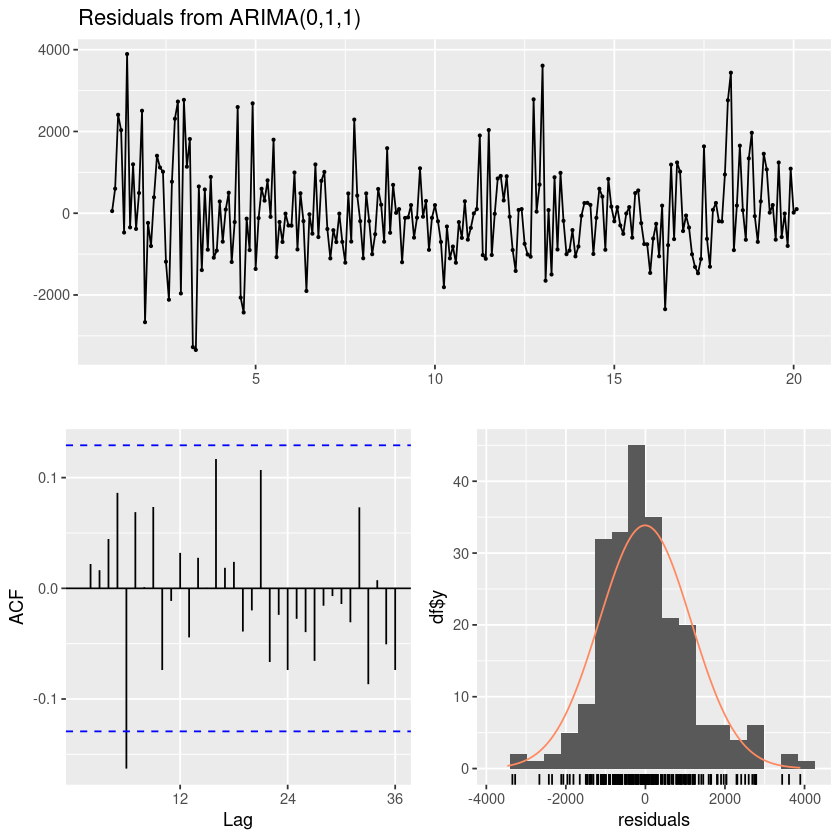

In [112]:
forecast::checkresiduals(fit)

- 5번째 시차 뭐냐

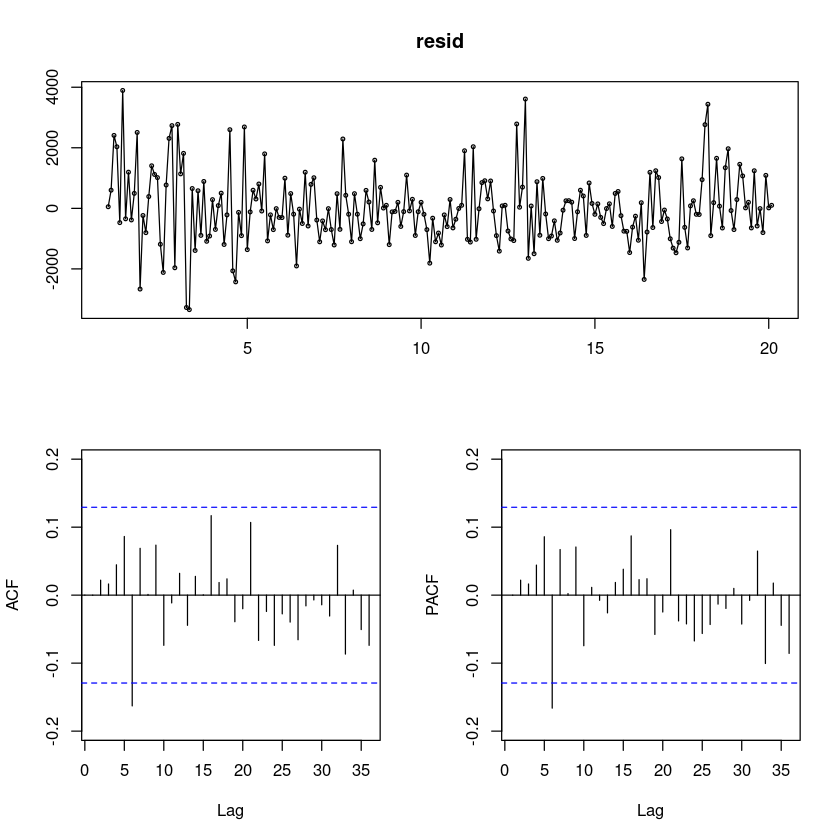

In [116]:
resid = resid(fit)
forecast::tsdisplay(resid)

In [117]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit, lags=c(6,12,18,24))

,lags,statistic,df,p-value
,6,8.728782,5,0.1203836
,12,12.770020,11,0.3086222
,18,17.077177,17,0.4491493
,24,23.178420,23,0.4503932


In [118]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: normal


	Jarque Bera Test

data:  resid
X-squared = 23.774, df = 2, p-value = 6.878e-06


- 정규분포가 아니넹.

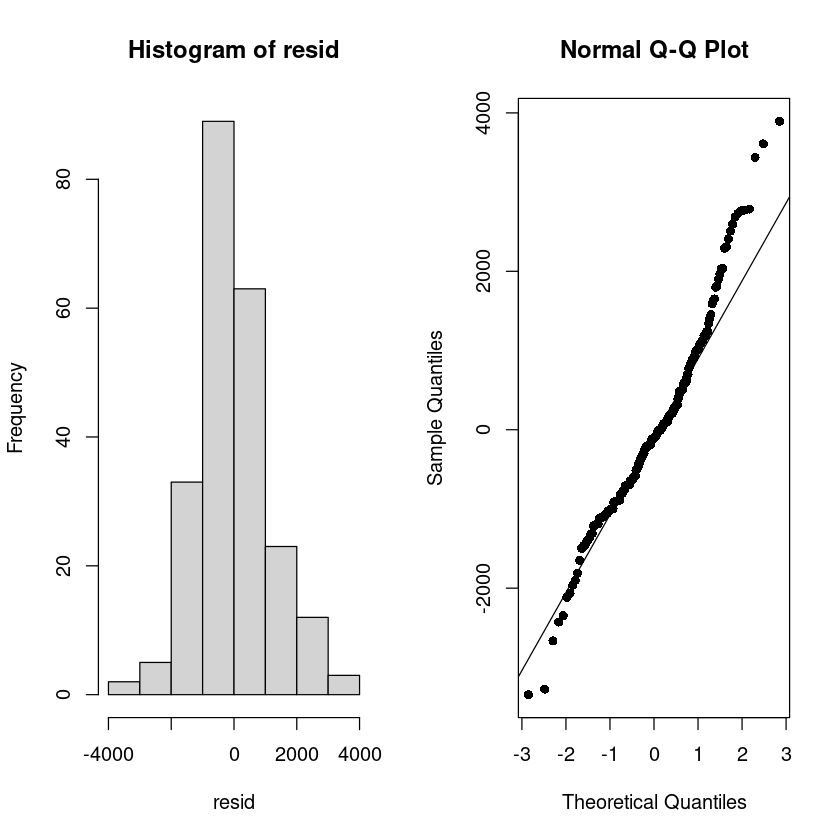

In [119]:
par(mfrow=c(1,2))
hist(resid)

qqnorm(resid, pch=16)
qqline(resid)

initial  value 7.051150 
iter   2 value 7.051051
iter   3 value 7.051051
iter   3 value 7.051051
iter   3 value 7.051051
final  value 7.051051 
converged
initial  value 7.051051 
iter   1 value 7.051051
final  value 7.051051 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
          ma1  constant
      -0.0138   -7.9038
s.e.   0.0646   75.2190

sigma^2 estimated as 1331879:  log likelihood = -1939.63,  aic = 3885.26

$degrees_of_freedom
[1] 227

$ttable
         Estimate      SE t.value p.value
ma1       -0.0138  0.0646 -0.2130  0.8315
constant  -7.9038 75.2190 -0.1051  0.9164

$AIC
[1] 16.96618

$AICc
[1] 16.96641

$BIC
[1] 17.01116


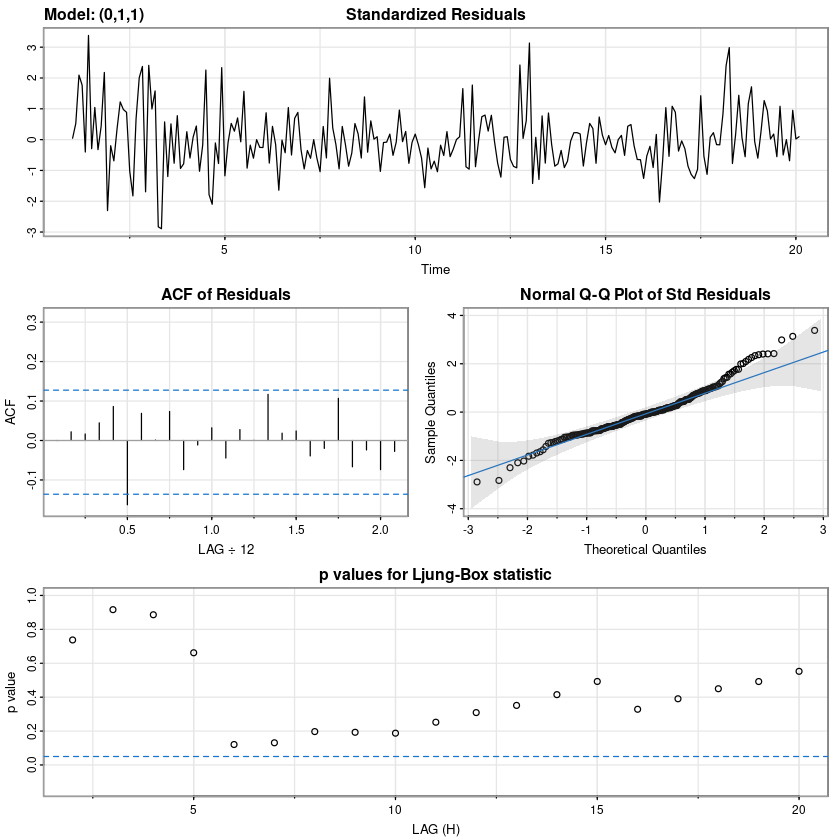

In [120]:
## 잔차 검정
astsa::sarima(z, p=0, d=1, q=1)

In [121]:
fore_fit <- forecast::forecast(fit, 25)
fore_fit

       Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 20       50898.63 49419.59 52377.66 48636.64 53160.62
Apr 20       50898.63 48821.22 52976.03 47721.51 54075.75
May 20       50898.63 48360.19 53437.07 47016.42 54780.84
Jun 20       50898.63 47970.87 53826.38 46421.01 55376.24
Jul 20       50898.63 47627.57 54169.68 45895.98 55901.28
Aug 20       50898.63 47317.03 54480.23 45421.04 56376.22
Sep 20       50898.63 47031.34 54765.92 44984.12 56813.14
Oct 20       50898.63 46765.35 55031.91 44577.32 57219.94
Nov 20       50898.63 46515.47 55281.79 44195.17 57602.09
Dec 20       50898.63 46279.09 55518.17 43833.65 57963.60
Jan 21       50898.63 46054.23 55743.03 43489.76 58307.50
Feb 21       50898.63 45839.35 55957.90 43161.13 58636.12
Mar 21       50898.63 45633.24 56164.02 42845.91 58951.35
Apr 21       50898.63 45434.89 56362.36 42542.57 59254.69
May 21       50898.63 45243.50 56553.76 42249.86 59547.40
Jun 21       50898.63 45058.38 56738.88 41966.73 59830.52
Jul 21       5

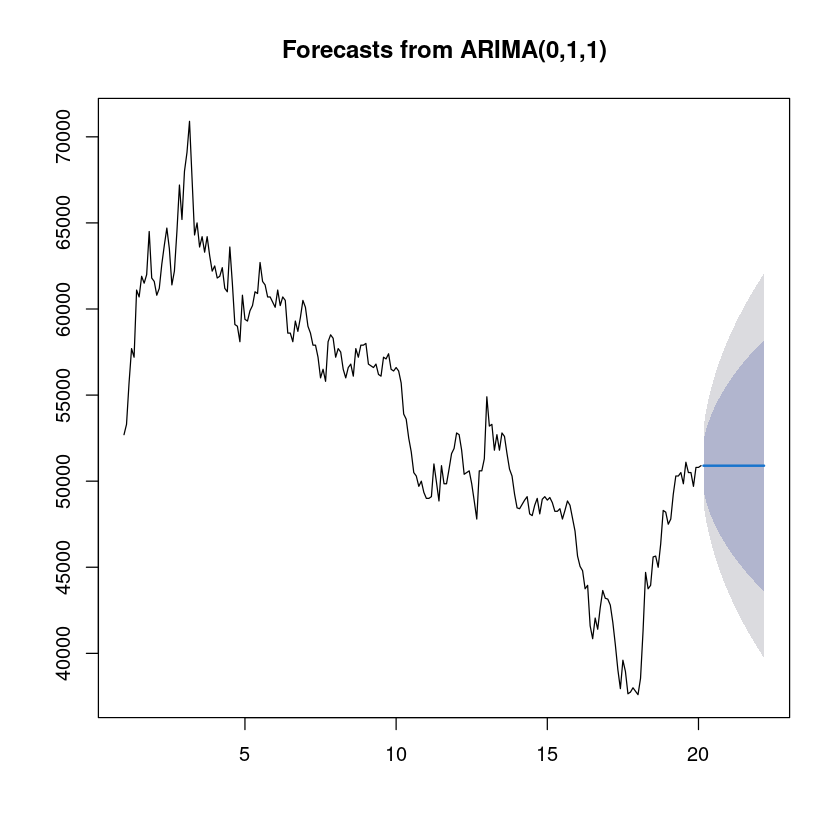

In [122]:
plot(fore_fit)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
20,,,50890.61,50882.70,50874.80,50866.90,50858.99,50851.09,50843.18,50835.28,50827.38,50819.47
21,50811.57,50803.67,50795.76,50787.86,50779.95,50772.05,50764.15,50756.24,50748.34,50740.43,50732.53,50724.63
22,50716.72,50708.82,50700.92,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
20,,,1154.070,1620.915,1980.620,2284.369,2552.221,2794.516,3017.417,3224.949,3419.910,3604.341
21,3779.783,3947.436,4108.252,4263.006,4412.336,4556.775,4696.774,4832.719,4964.943,5093.737,5219.352,5342.015
22,5461.924,5579.257,5694.172,,,,,,,,,


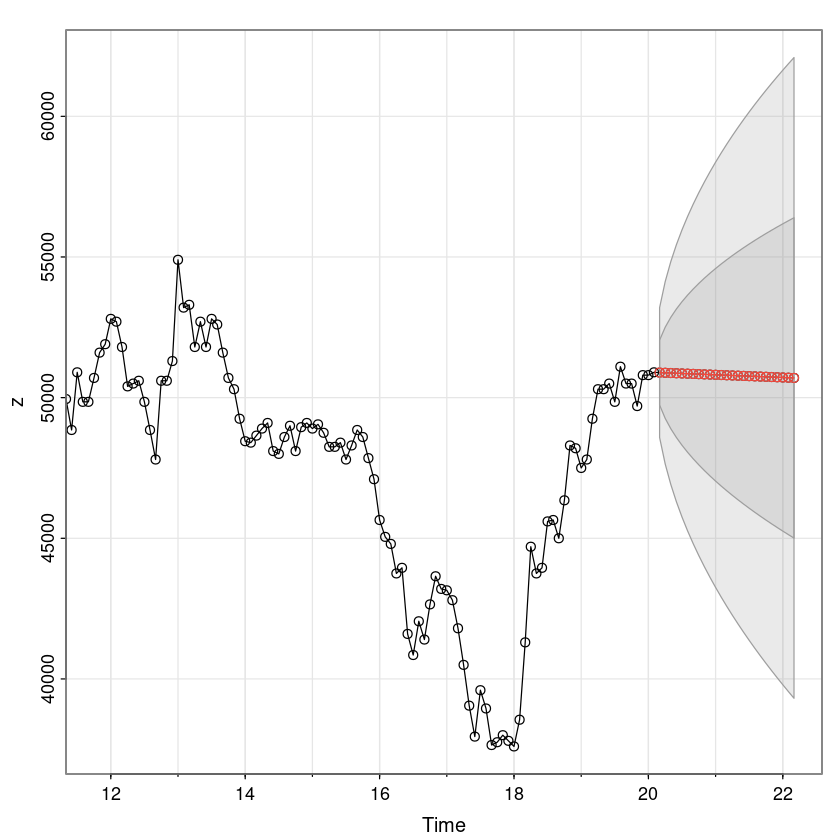

In [123]:
astsa::sarima.for(z, 25, 0,1,1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
20,,,-9.392518,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833
21,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833,-7.903833
22,-7.903833,-7.903833,-7.903833,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
20,,,1154.07,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18
21,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18,1154.18
22,1154.18,1154.18,1154.18,,,,,,,,,


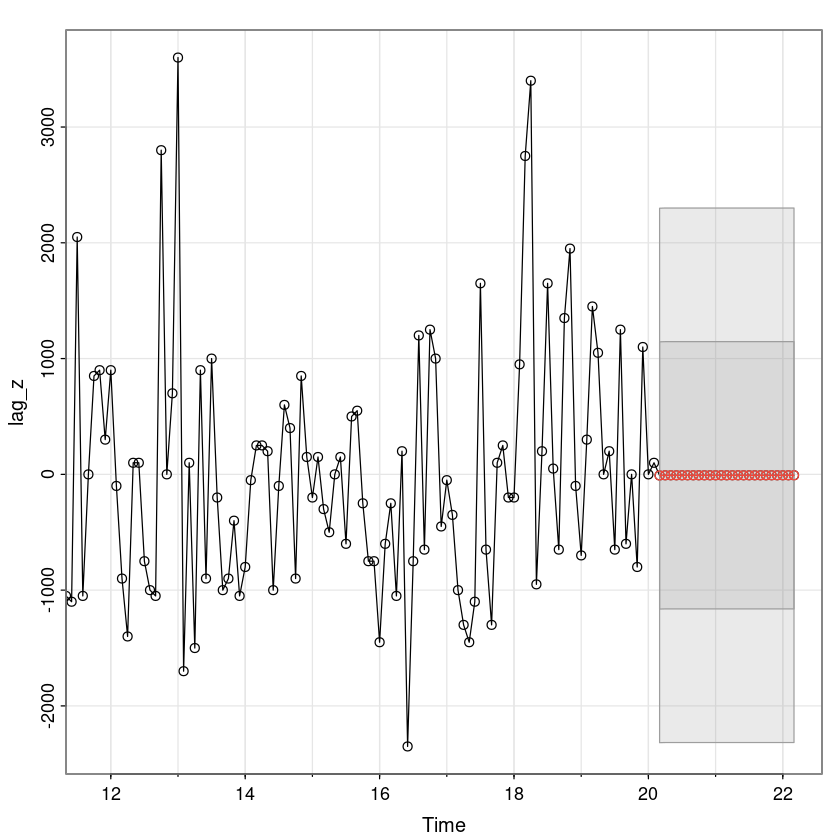

In [124]:
astsa::sarima.for(lag_z, 25, 0,0,1)

# 8:2

In [138]:
train_data <- window(z, start = start(z), end = index(z)[184])
test_data <- window(z, start = index(z)[185])

In [143]:
length(train_data)

[1] 184

In [142]:
length(test_data)

[1] 46

In [146]:
test_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
16,,,,,43950,41600,40850,42050,41400,42650,43650,43200
17,43150,42800,41800,40500,39050,37950,39600,38950,37650,37750,38000,37800
18,37600,38550,41300,44700,43750,43950,45600,45650,45000,46350,48300,48200
19,47500,47800,49250,50300,50300,50500,49850,51100,50500,50500,49700,50800
20,50800,50900,,,,,,,,,,


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
16,,,,,43765.61,43716.78,43667.94,43619.11,43570.28,43521.44,43472.61,43423.78
17,43374.95,43326.11,43277.28,43228.45,43179.61,43130.78,43081.95,43033.11,42984.28,42935.45,42886.61,42837.78
18,42788.95,42740.11,42691.28,42642.45,42593.61,42544.78,42495.95,42447.12,42398.28,42349.45,42300.62,42251.78
19,42202.95,42154.12,42105.28,42056.45,42007.62,41958.78,41909.95,41861.12,41812.28,41763.45,41714.62,41665.79
20,41616.95,41568.12,,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
16,,,,,1154.524,1581.835,1916.110,2200.172,2451.537,2679.423,2889.392,3085.103
17,3269.119,3443.314,3609.112,3767.621,3919.725,4066.143,4207.469,4344.200,4476.756,4605.499,4730.740,4852.749
18,4971.765,5087.998,5201.635,5312.841,5421.767,5528.547,5633.304,5736.147,5837.179,5936.492,6034.171,6130.293
19,6224.931,6318.152,6410.017,6500.584,6589.907,6678.035,6765.015,6850.891,6935.703,7019.491,7102.291,7184.136


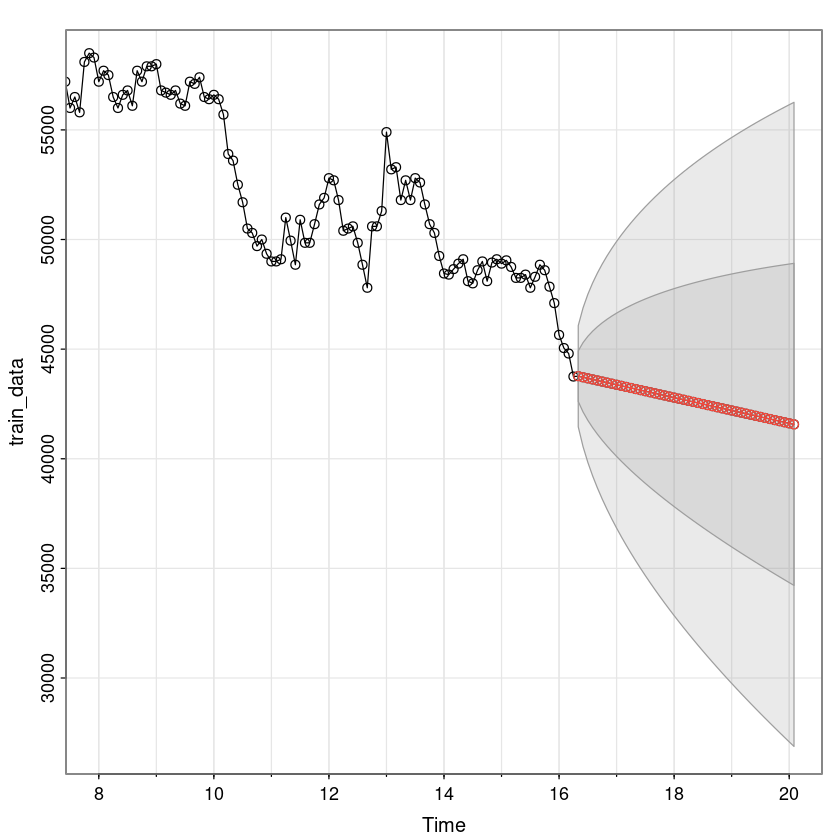

In [147]:
astsa::sarima.for(train_data, 46, 0,1,1)

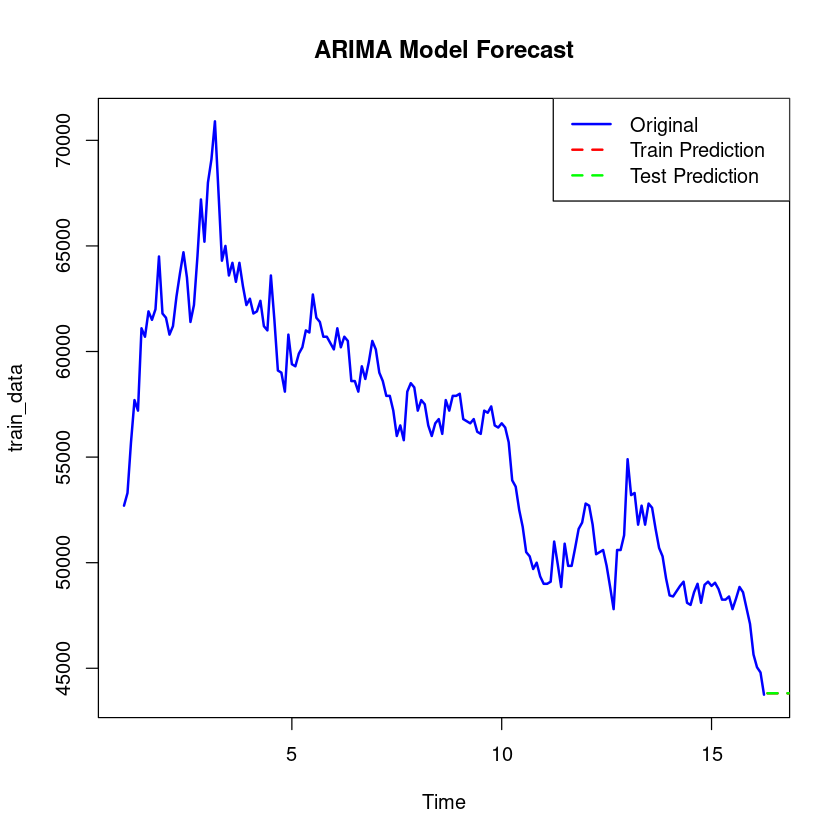

In [150]:
arima_model <- arima(train_data, order = c(0, 1, 1))

# 훈련 세트 예측
train_pred <- predict(arima_model, n.ahead = length(train_data))

# 테스트 세트 예측
test_pred <- predict(arima_model, n.ahead = length(test_data))

# 시각화
plot(train_data, col = "blue", type = "l", lty = 1, lwd = 2, main = "ARIMA Model Forecast")
lines(train_pred$pred, col = "red", lty = 2, lwd = 2)
lines(test_pred$pred, col = "green", lty = 2, lwd = 2)
legend("topright", legend = c("Original", "Train Prediction", "Test Prediction"), col = c("blue", "red", "green"), lty = c(1, 2, 2), lwd = c(2, 2, 2))

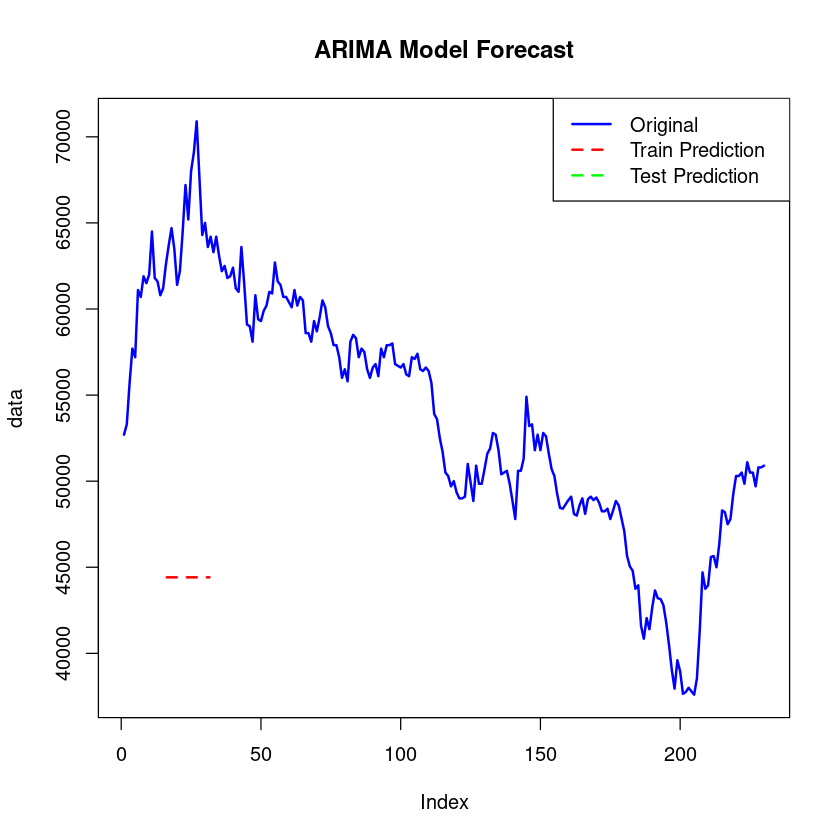

In [151]:
# ARIMA 모델 적합
arima_model <- arima(train_data, order = c(0, 1, 1))

# 훈련 세트 예측
train_pred <- predict(arima_model, n.ahead = length(train_data))$pred + diff(train_data)[1]

# 테스트 세트 예측
test_pred <- predict(arima_model, n.ahead = length(test_data))$pred + diff(train_data)[length(train_data)]

# 시각화
plot(data, col = "blue", type = "l", lty = 1, lwd = 2, main = "ARIMA Model Forecast")
lines(train_pred, col = "red", lty = 2, lwd = 2)
lines(c(rep(NA, length(train_data)), test_pred), col = "green", lty = 2, lwd = 2)
legend("topright", legend = c("Original", "Train Prediction", "Test Prediction"), col = c("blue", "red", "green"), lty = c(1, 2, 2), lwd = c(2, 2, 2))


- index가 안맞아서 위와같이 되네;; 흠..

In [152]:
data <- kakao$종가

In [158]:
length(data)

[1] 230

In [164]:
tr <- data[1:184]
ts <- data[185:length(data)]

$pred
Time Series:
Start = 185 
End = 230 
Frequency = 1 
 [1] 43765.61 43716.78 43667.94 43619.11 43570.28 43521.44 43472.61 43423.78
 [9] 43374.95 43326.11 43277.28 43228.45 43179.61 43130.78 43081.95 43033.11
[17] 42984.28 42935.45 42886.61 42837.78 42788.95 42740.11 42691.28 42642.45
[25] 42593.61 42544.78 42495.95 42447.12 42398.28 42349.45 42300.62 42251.78
[33] 42202.95 42154.12 42105.28 42056.45 42007.62 41958.78 41909.95 41861.12
[41] 41812.28 41763.45 41714.62 41665.79 41616.95 41568.12

$se
Time Series:
Start = 185 
End = 230 
Frequency = 1 
 [1] 1154.524 1581.835 1916.110 2200.172 2451.537 2679.423 2889.392 3085.103
 [9] 3269.119 3443.314 3609.112 3767.621 3919.725 4066.143 4207.469 4344.200
[17] 4476.756 4605.499 4730.740 4852.749 4971.765 5087.998 5201.635 5312.841
[25] 5421.767 5528.547 5633.304 5736.147 5837.179 5936.492 6034.171 6130.293
[33] 6224.931 6318.152 6410.017 6500.584 6589.907 6678.035 6765.015 6850.891
[41] 6935.703 7019.491 7102.291 7184.136 7265.059 7345.091

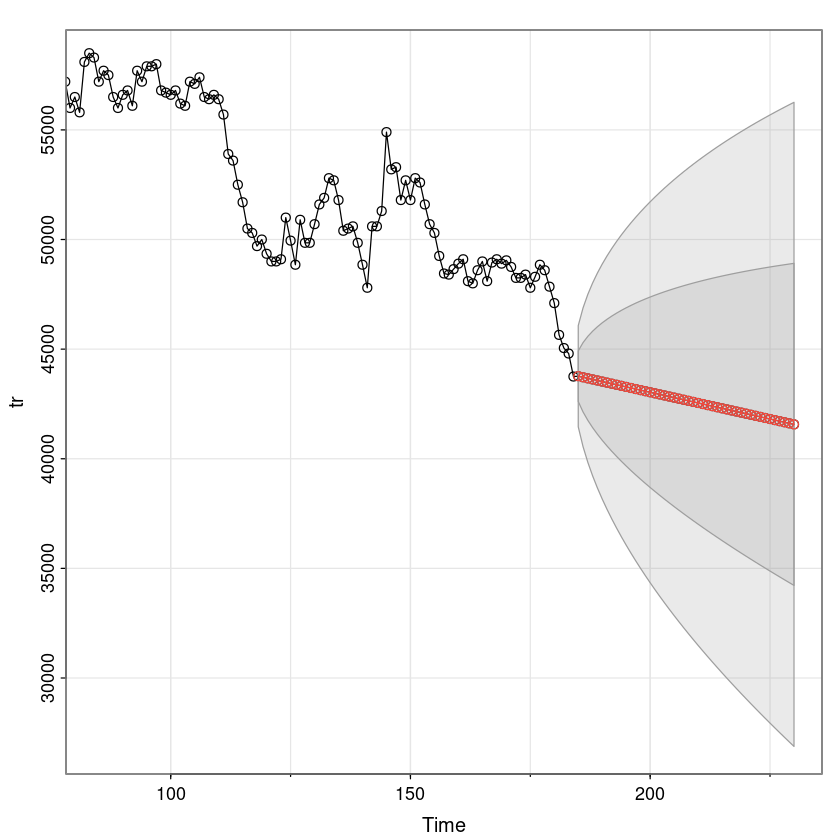

In [165]:
astsa::sarima.for(tr, 46, 0,1,1)